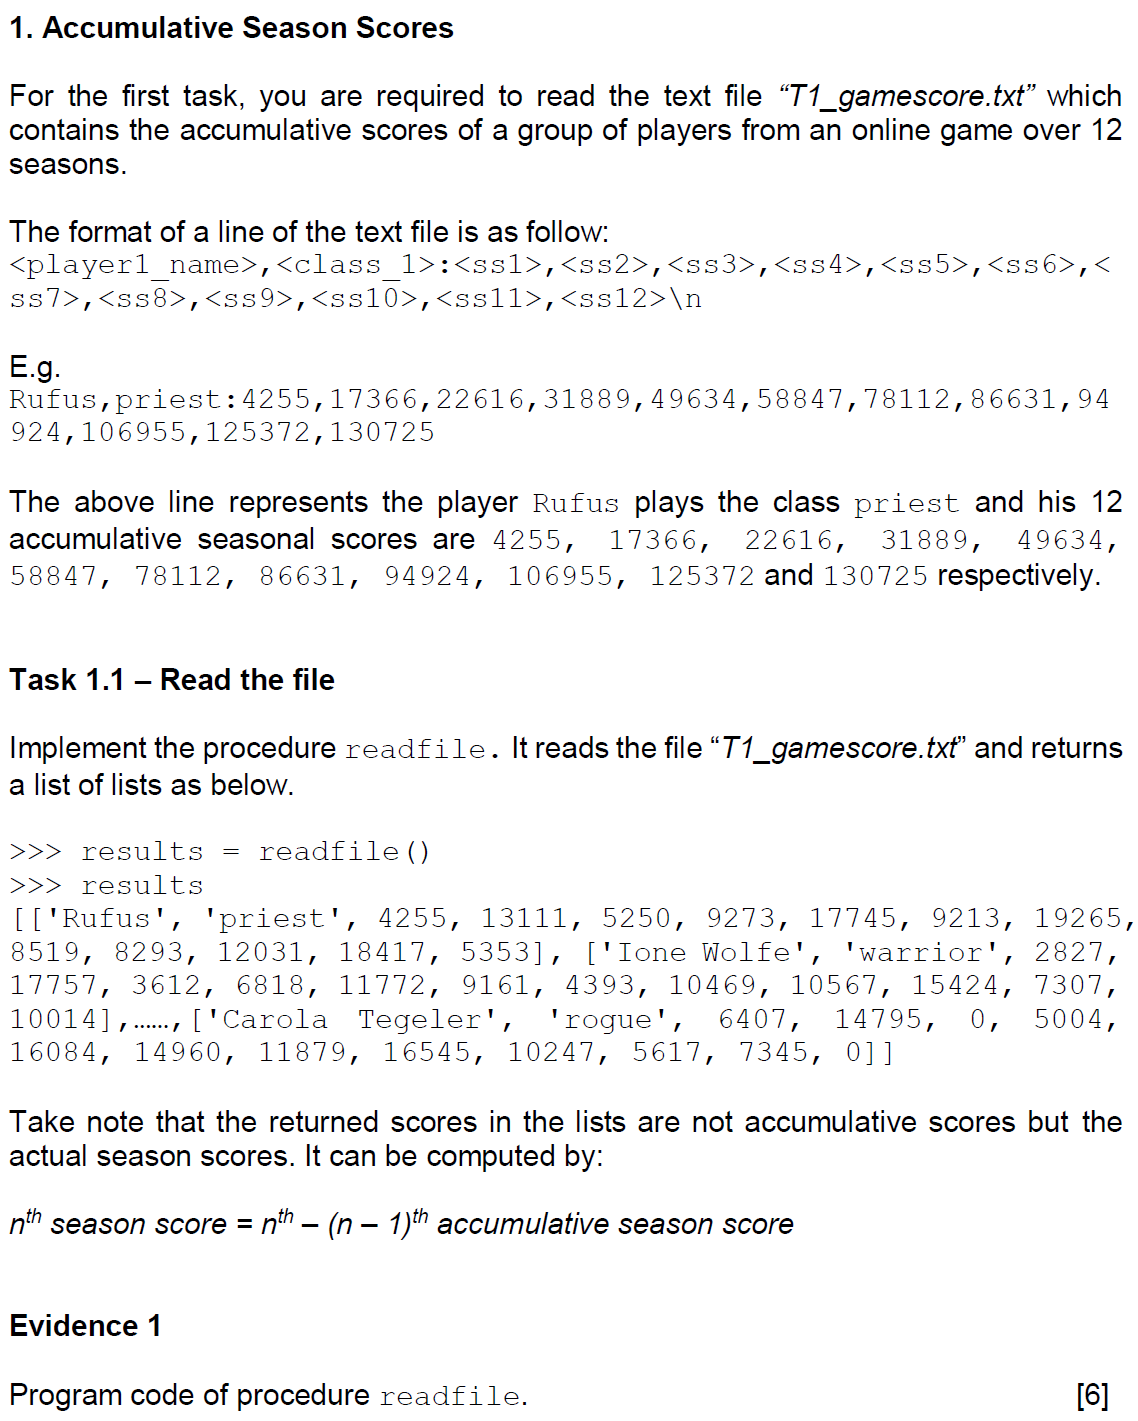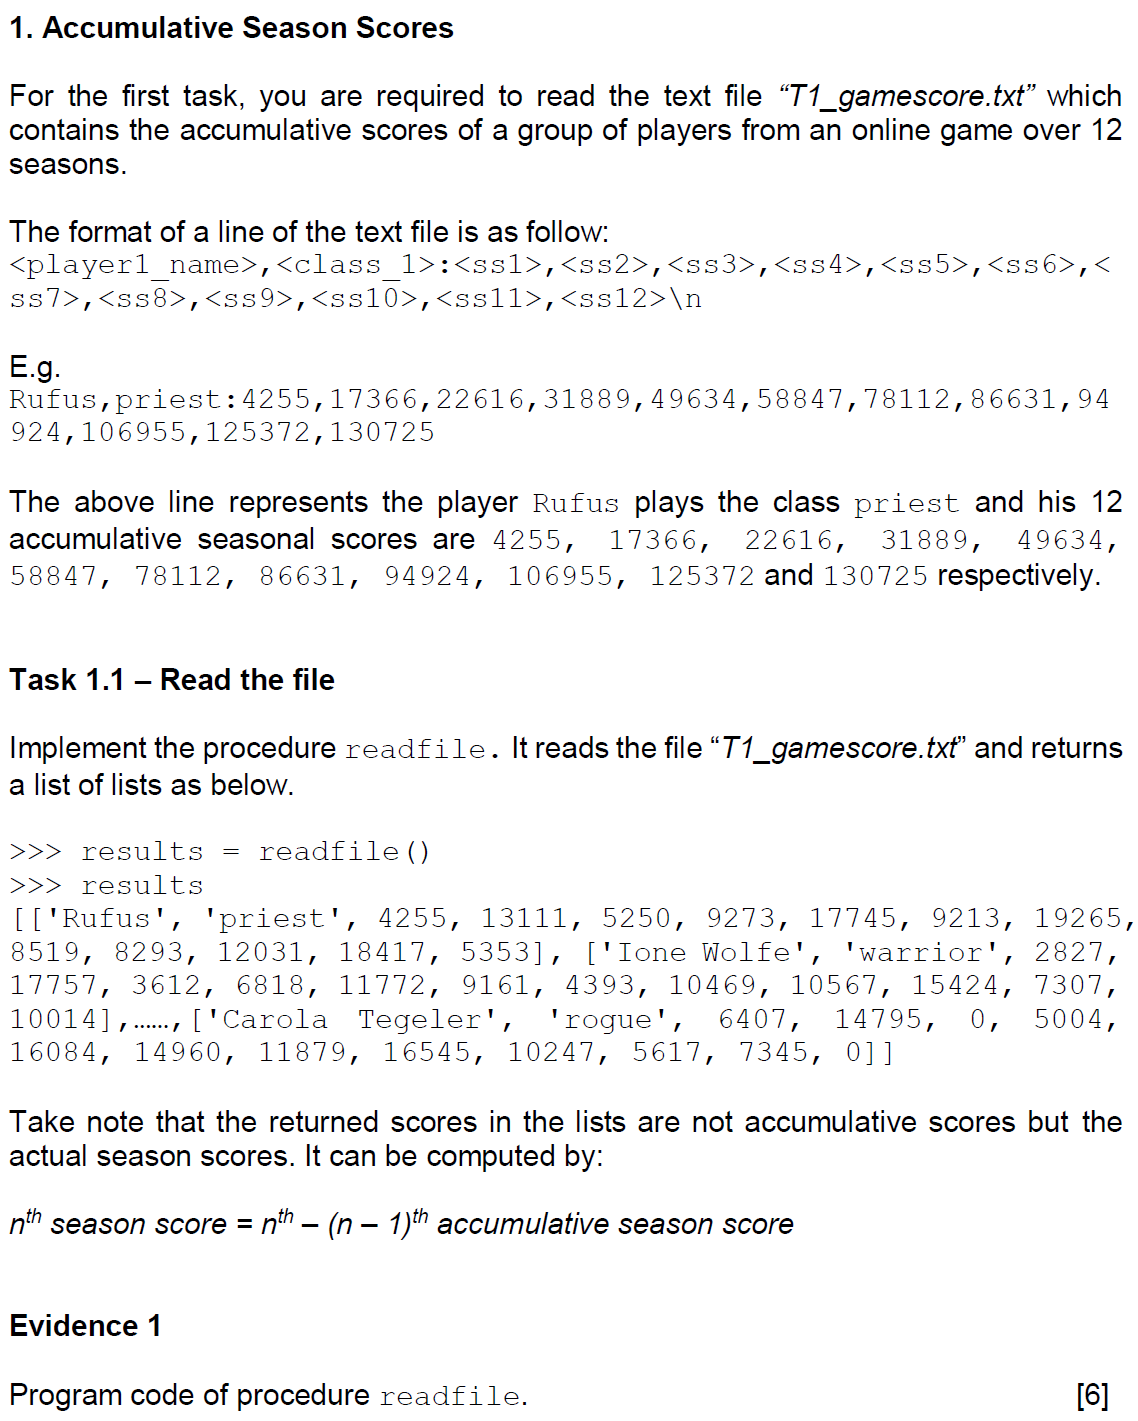

```
Rufus,priest:4255,17366,22616,31889,49634,58847,78112,86631,94924,106955,125372,130725
Ione Wolfe,warrior:2827,20584,24196,31014,42786,51947,56340,66809,77376,92800,100107,110121
Hillary Curl,hunter:9139,23198,23198,30878,48804,66915,72755,81466,90198,110023,125034,143881
Juli Barnhill,rogue:8021,24439,32877,41020,51543,62857,67854,67854,79480,85470,101411,117135
Tashia Bowen,mage:9788,28173,35005,50231,64529,67462,74808,93845,93845,102517,102517,102517
...
```

In [139]:
def readfile():
    data = []
    tmp = ''

    with open('T1_gamescore.txt', 'r') as f:
        tmp = f.read()

    tmp = tmp.replace(':', ',')

    with open('T1_gamescore.txt.tmp', 'w') as f:
        f.write(tmp)

    with open('T1_gamescore.txt.tmp','r') as f:
        import csv
        csv_r = csv.reader(f)
        data = list(csv_r)
    for i in range(len(data)):
        for j in range(len(data[0])-1, 2, -1):
            data[i][j] = int(data[i][j]) - int(data[i][j-1])
        data[i][2] = int(data[i][2])
    return data

In [140]:
readfile()

[['Rufus',
  'priest',
  4255,
  13111,
  5250,
  9273,
  17745,
  9213,
  19265,
  8519,
  8293,
  12031,
  18417,
  5353],
 ['Ione Wolfe',
  'warrior',
  2827,
  17757,
  3612,
  6818,
  11772,
  9161,
  4393,
  10469,
  10567,
  15424,
  7307,
  10014],
 ['Hillary Curl',
  'hunter',
  9139,
  14059,
  0,
  7680,
  17926,
  18111,
  5840,
  8711,
  8732,
  19825,
  15011,
  18847],
 ['Juli Barnhill',
  'rogue',
  8021,
  16418,
  8438,
  8143,
  10523,
  11314,
  4997,
  0,
  11626,
  5990,
  15941,
  15724],
 ['Tashia Bowen',
  'mage',
  9788,
  18385,
  6832,
  15226,
  14298,
  2933,
  7346,
  19037,
  0,
  8672,
  0,
  0],
 ['Marguerita Mciver',
  'hunter',
  7219,
  19472,
  8518,
  6154,
  17251,
  8163,
  7060,
  0,
  0,
  16684,
  0,
  12824],
 ['Sharie Schall',
  'hunter',
  5113,
  17844,
  16536,
  2789,
  19545,
  19838,
  9992,
  10794,
  3445,
  8579,
  4331,
  19542],
 ['Paris Curington',
  'hunter',
  6885,
  5380,
  6884,
  15338,
  3209,
  11119,
  15045,
  14563,
 

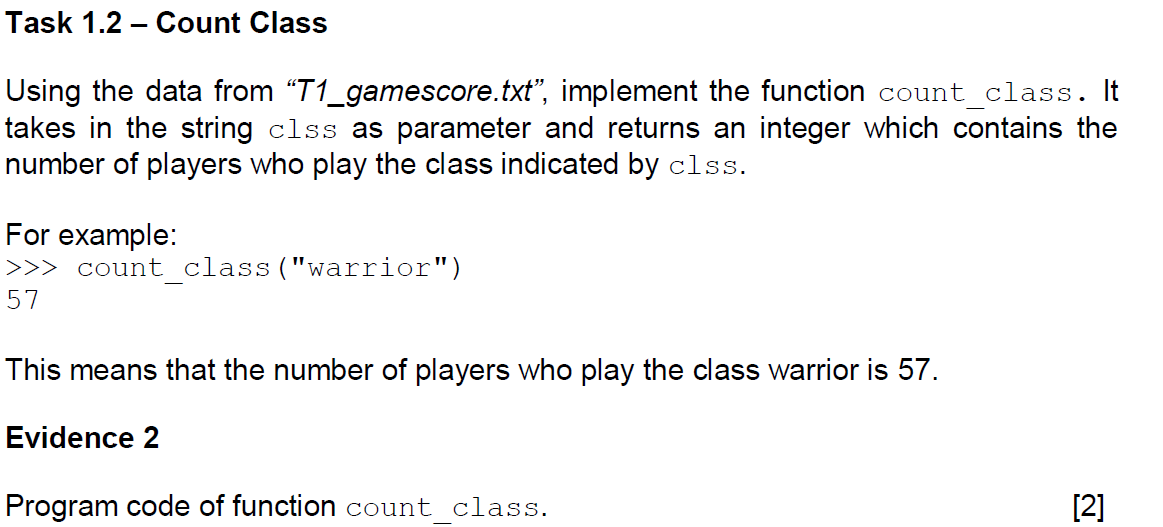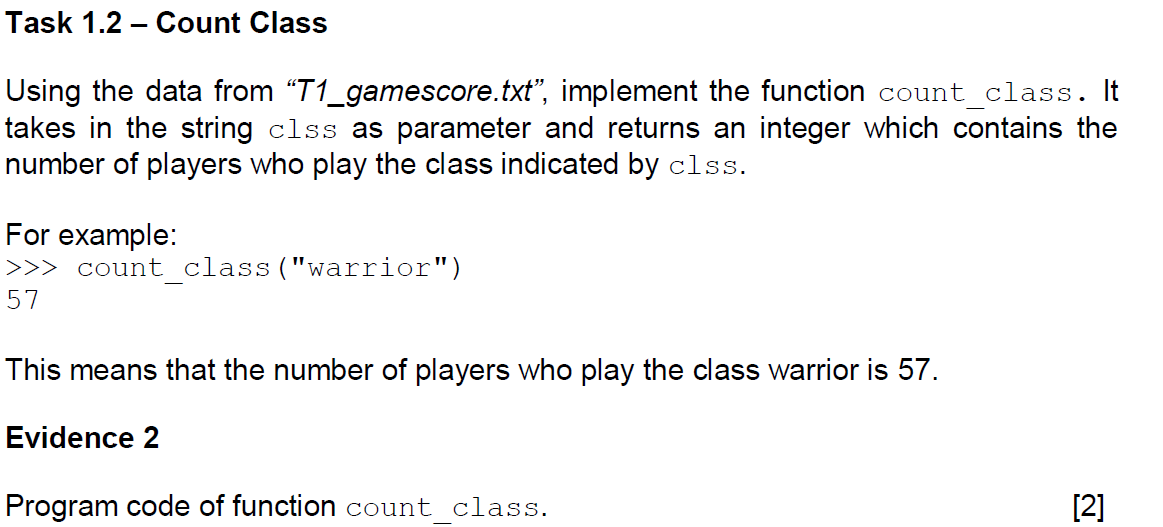

In [103]:
def count_class(clss):
    results = readfile()
    count = 0
    for line in results:
        if clss == line[1]:
            count += 1
    return count

In [104]:
count_class('warrior')

57

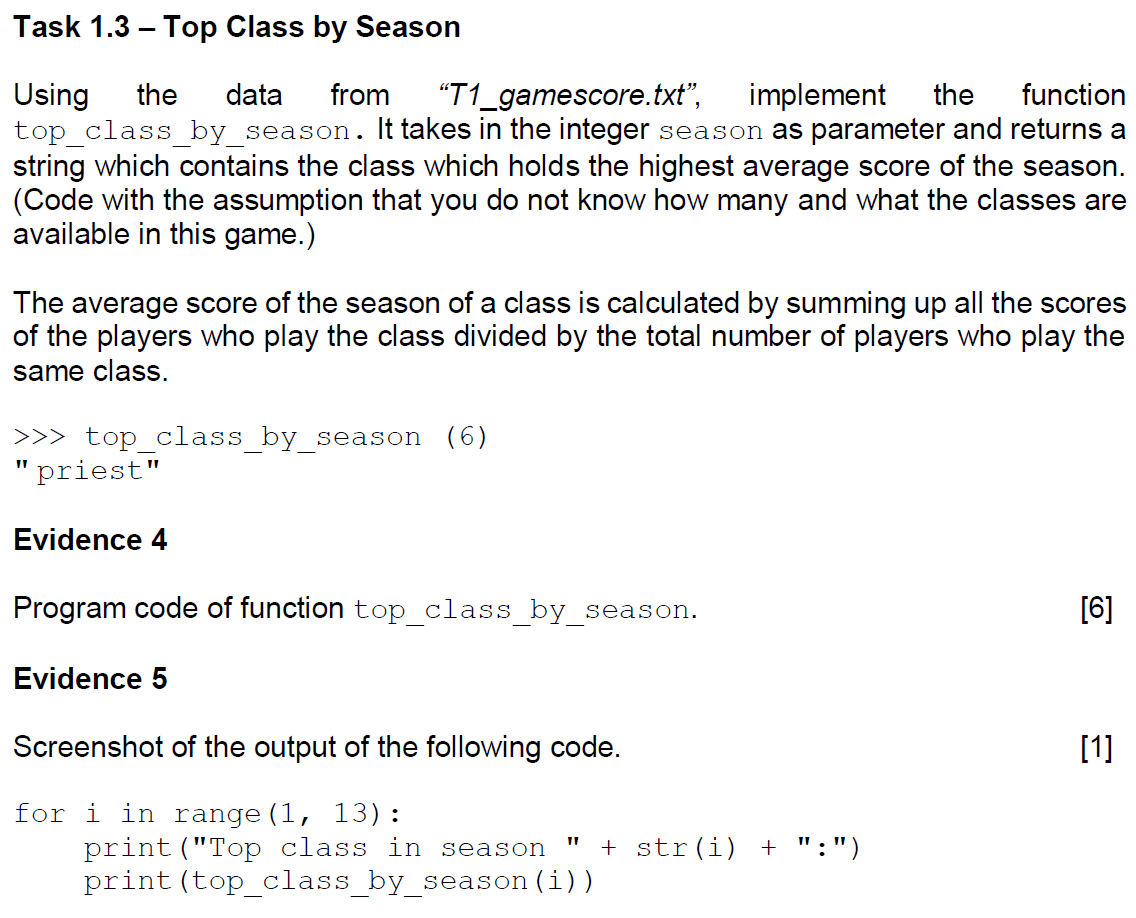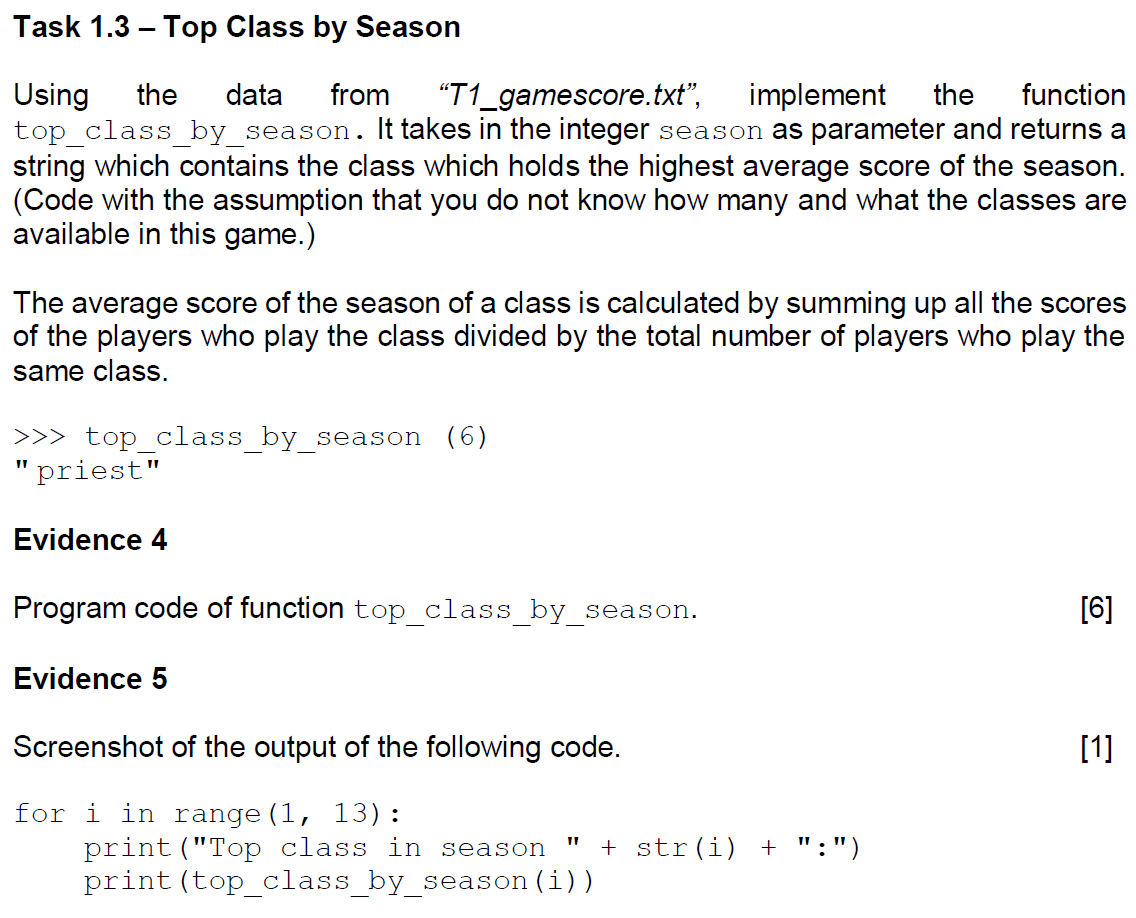

In [105]:
def get_classes():
    results = readfile()
    classes = []
    for i in results:
        classes.append(i[1])
    classes = set(classes)
    classes = list(classes)
    return classes

In [106]:
get_classes()

['paladin', 'shaman', 'priest', 'mage', 'warrior', 'rogue', 'hunter']

In [107]:
def top_class_by_season(season):
    classes = get_classes()
    results = readfile()
    average_score_classes = []
    for i in classes:
        results_class_filtered = [int(x[season+1]) for x in results if x[1] == i]
        avg_score = sum(results_class_filtered) / len(results_class_filtered)
        average_score_classes.append([i, avg_score])
    # print(sorted(average_score_classes, key=lambda a:a[1], reverse=True))
    return sorted(average_score_classes, key=lambda a:a[1], reverse=True)[0][0]

In [108]:
top_class_by_season(6)

'priest'

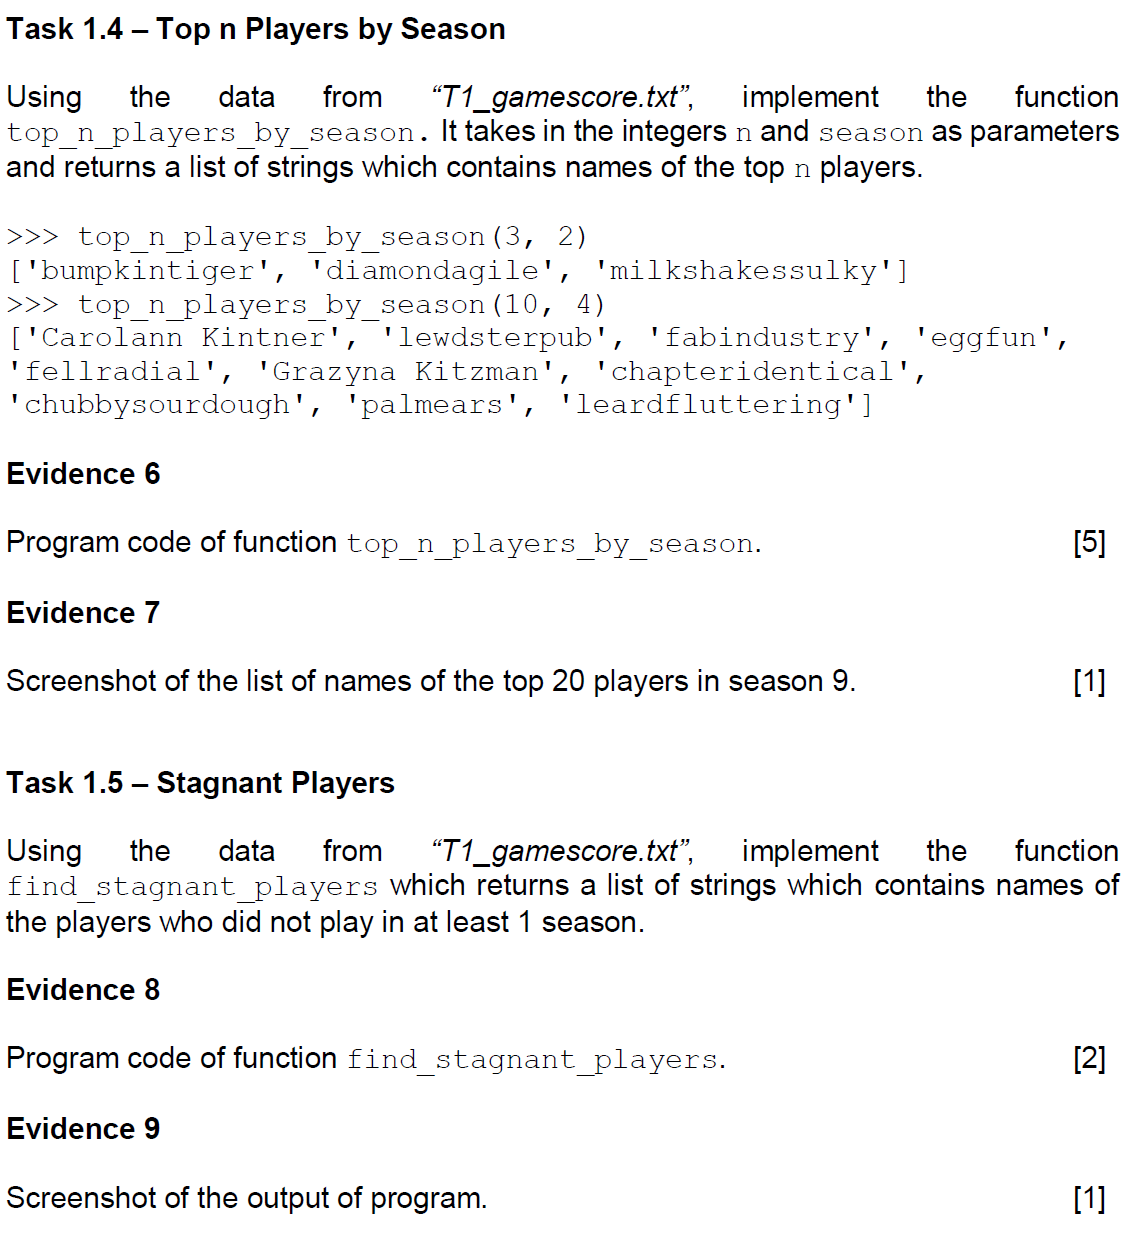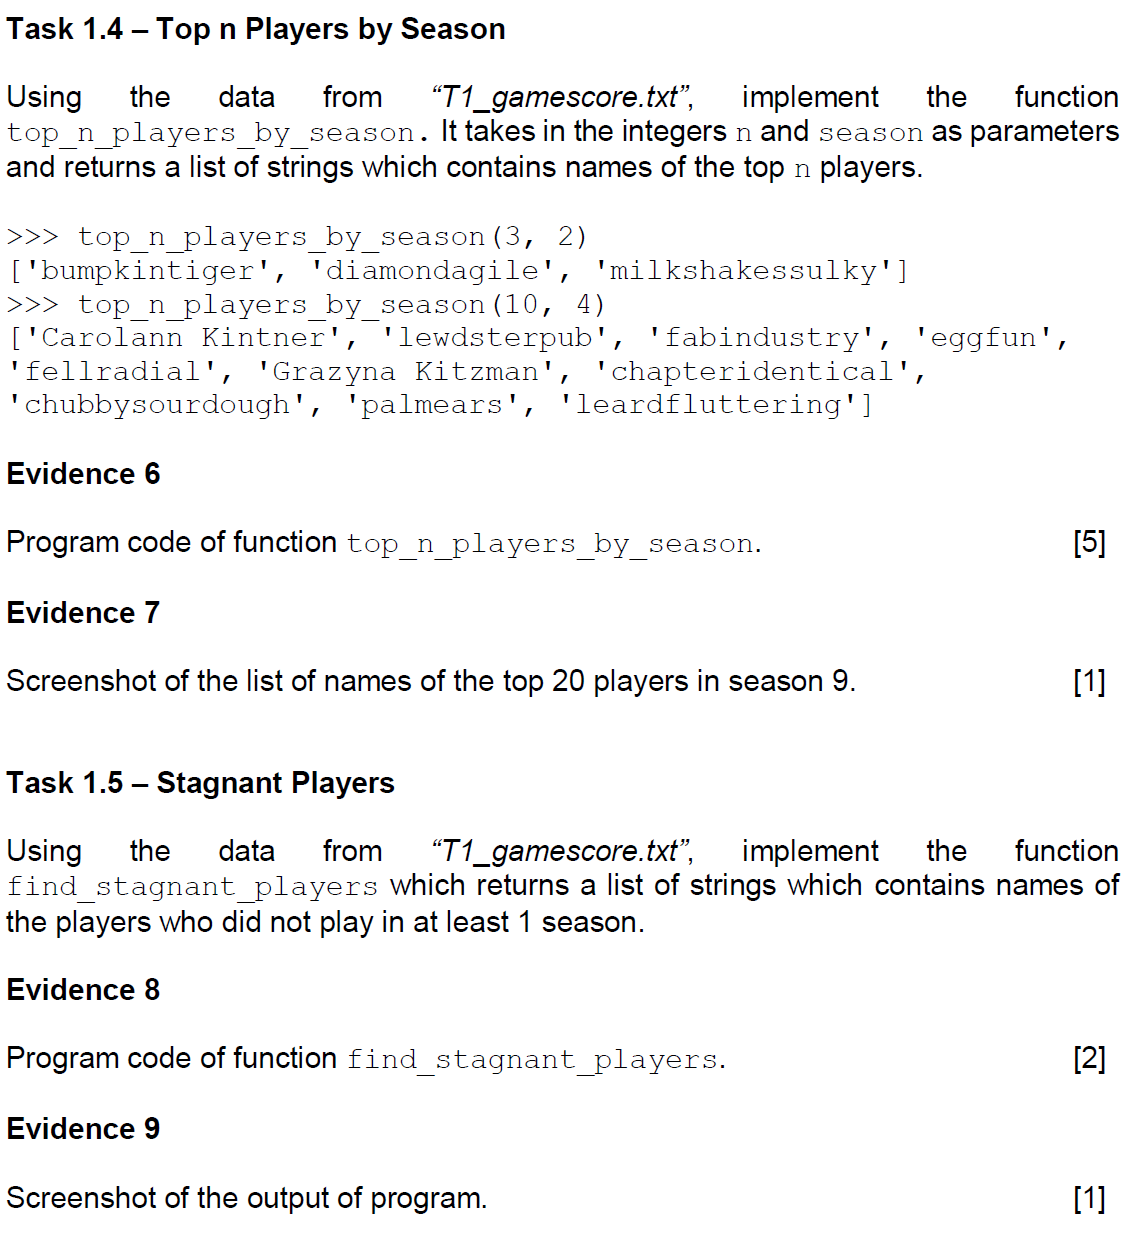

In [109]:
def top_n_players_by_season(n, season):
    season_filtered = [[i[0]]+[int(i[season+1])] for i in readfile()]
    #print(sorted(season_filtered, key=lambda a:a[1], reverse=True))
    return [i[0] for i in sorted(season_filtered, key=lambda a:a[1], reverse=True)[:n]]

In [110]:
top_n_players_by_season(20,9)

['carsour',
 'kingfuplayed',
 'salinitythine',
 'tidallymatch',
 'Abdul Boland',
 'ruditesandstone',
 'girlguidecustard',
 'renalmiranda',
 'fabindustry',
 'Apryl Soileau',
 'scullingroaring',
 'Luanne Lett',
 'happenedcrabs',
 'kosherfagglers',
 'beepingwings',
 'Ashely Faye',
 'burstmars',
 'Darlena Crimi',
 'roaringblueberries',
 'otherwisecentaurs']

In [146]:
def find_stagnant_players():
    tmp = [[i[0]]+[[int(j) for j in i[2:]]] for i in readfile()]
    #print(tmp)
    stagnant_players = [i[0] for i in tmp if i[1].count(0)>0]
    return stagnant_players

In [147]:
find_stagnant_players()

['Hillary Curl',
 'Juli Barnhill',
 'Tashia Bowen',
 'Marguerita Mciver',
 'Elvia Dubreythankfulautomatic',
 'inspectport',
 'chubbysourdough',
 'palmears',
 'shotgunpeacock',
 'basteglean',
 'gulpraisin',
 'baffinglass',
 'integersolder',
 'brillogrowth',
 'chapteridentical',
 'learningsmace',
 'halreckless',
 'vanadiumshuffle',
 'odiferousbasket',
 'blazecarnot',
 'restraintroar',
 'wossglutinous',
 'salinitythine',
 'ukdroplet',
 'slowinterest',
 'dodgeballhashtag',
 'girlguidecustard',
 'lohnsjuicy',
 'otherwisecentaurs',
 'twochina',
 'numberlesszesty',
 'anchorrooden',
 'craftyof',
 'nonstophourglass',
 'whizzerunfolded',
 'portalchamb',
 'apiclique',
 'pickledfluorine',
 'mourningwet',
 'scullingroaring',
 'putridmanx',
 'bookfreely',
 'finaetools',
 'pieskull',
 'cliddlecalendar',
 'cliquedripping',
 'creamminister',
 'gargantuanpumped',
 'smallpoxsilver',
 'manpractical',
 'hadrondunbird',
 'letslupus',
 'xraystick',
 'eridanusphalanges',
 'lewdsterpub',
 'surfravioli',
 'inju

In [148]:
readfile()

[['Rufus',
  'priest',
  4255,
  13111,
  5250,
  9273,
  17745,
  9213,
  19265,
  8519,
  8293,
  12031,
  18417,
  5353],
 ['Ione Wolfe',
  'warrior',
  2827,
  17757,
  3612,
  6818,
  11772,
  9161,
  4393,
  10469,
  10567,
  15424,
  7307,
  10014],
 ['Hillary Curl',
  'hunter',
  9139,
  14059,
  0,
  7680,
  17926,
  18111,
  5840,
  8711,
  8732,
  19825,
  15011,
  18847],
 ['Juli Barnhill',
  'rogue',
  8021,
  16418,
  8438,
  8143,
  10523,
  11314,
  4997,
  0,
  11626,
  5990,
  15941,
  15724],
 ['Tashia Bowen',
  'mage',
  9788,
  18385,
  6832,
  15226,
  14298,
  2933,
  7346,
  19037,
  0,
  8672,
  0,
  0],
 ['Marguerita Mciver',
  'hunter',
  7219,
  19472,
  8518,
  6154,
  17251,
  8163,
  7060,
  0,
  0,
  16684,
  0,
  12824],
 ['Sharie Schall',
  'hunter',
  5113,
  17844,
  16536,
  2789,
  19545,
  19838,
  9992,
  10794,
  3445,
  8579,
  4331,
  19542],
 ['Paris Curington',
  'hunter',
  6885,
  5380,
  6884,
  15338,
  3209,
  11119,
  15045,
  14563,
 